**Eksempel 1**:

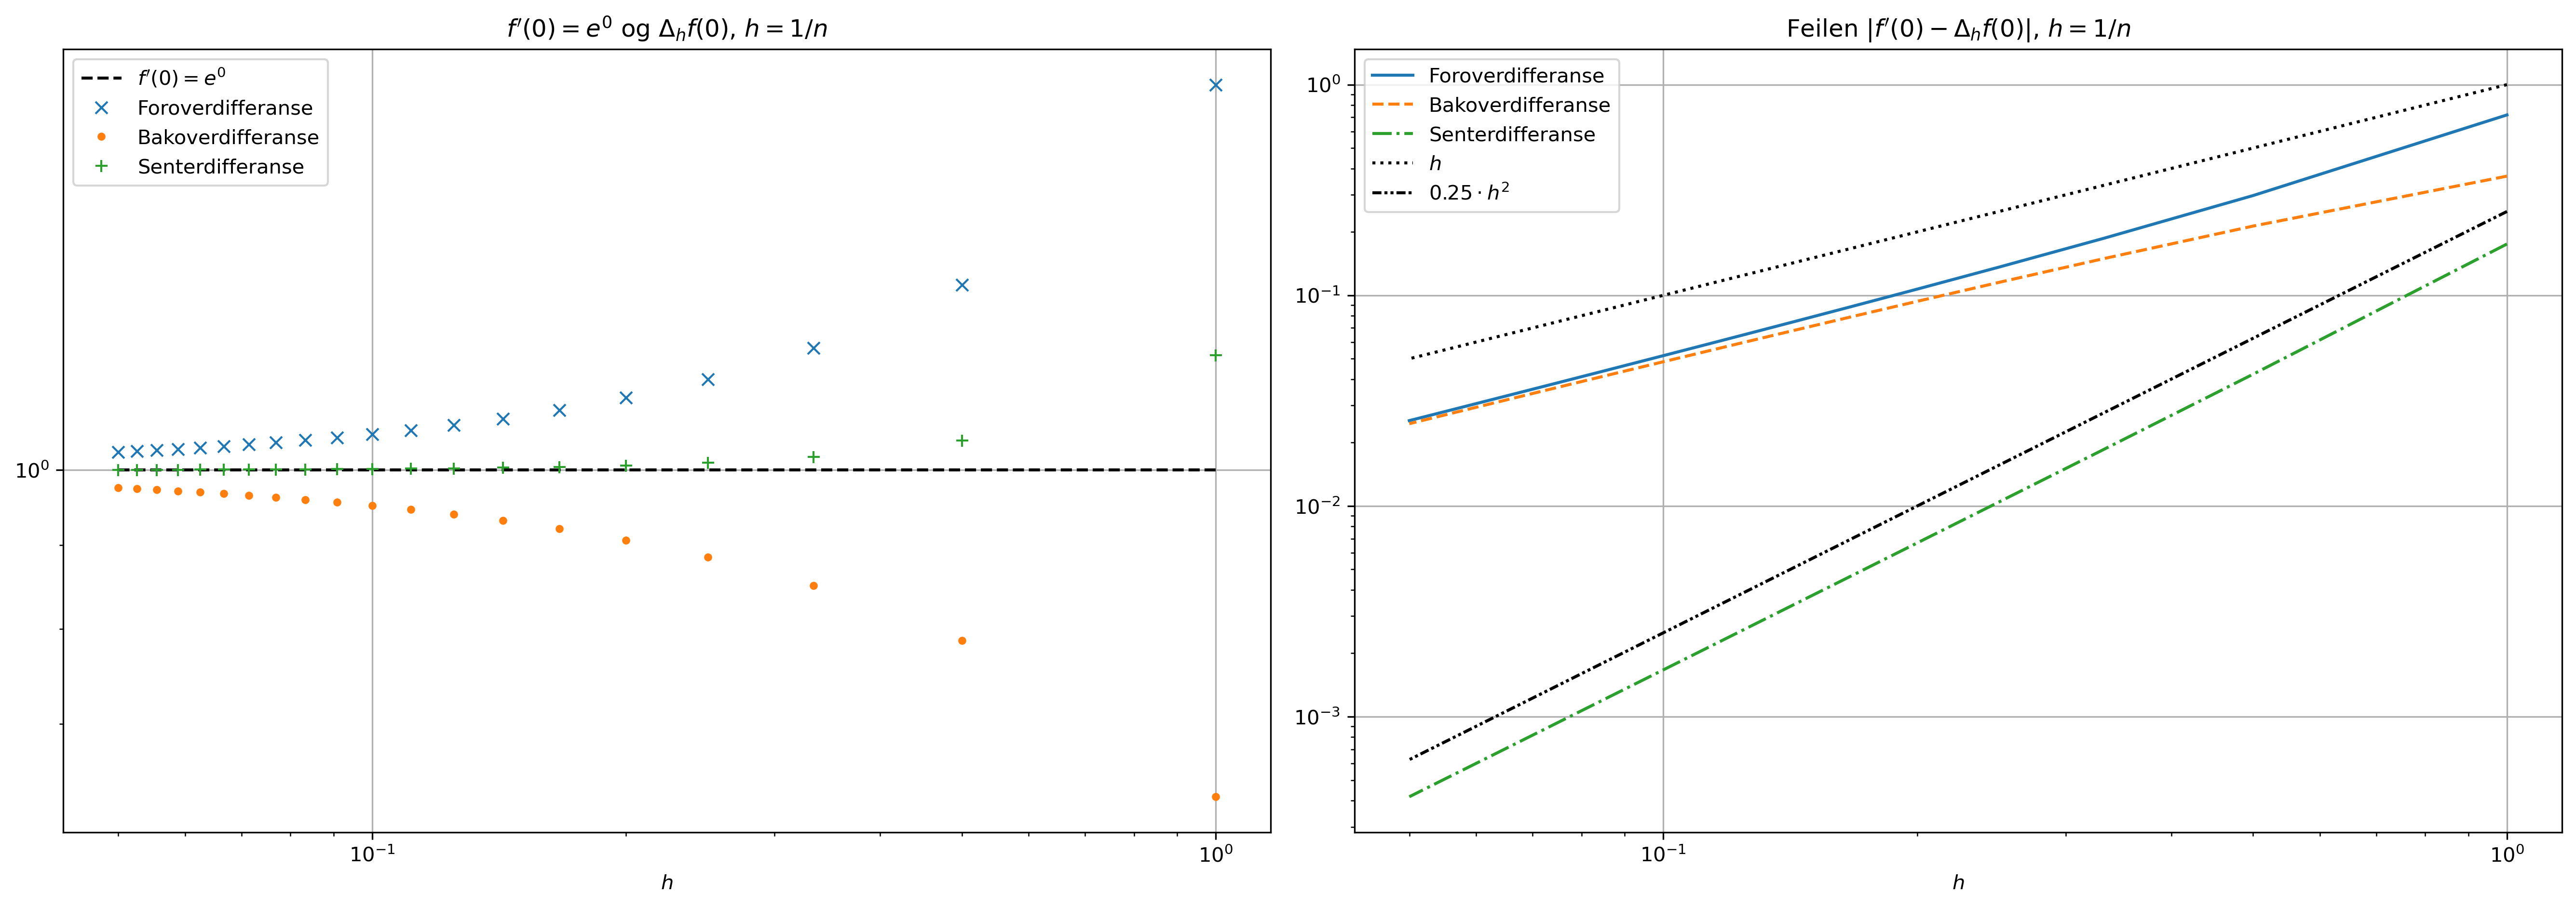

In [69]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

x = 0 # punktet vi vil finne den deriverte
N = 20 # antall verdier av h = 1/n, n = 1,...,N

g = np.zeros([N,3]) # matrise for differansene
H = np.array([1/n for n in range(1,N+1)]) # verdier av h

for n in range(0,N):
    h = H[n] #1/(n+1)
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)

xs = np.linspace(x-1,x+1,201)

fig1, (ax2,ax3) = plt.subplots(1,2,figsize=(18,6),dpi=300)
fig1.tight_layout()

#ax1.plot(xs,np.exp(xs),'k')
#ax1.plot([x,x+0.5],[np.exp(x),np.exp(x+0.5)])
#ax1.plot([x-0.5,x],[np.exp(x-0.5),np.exp(x)])
#ax1.plot([x-0.5,x+0.5],[np.exp(x-0.5),np.exp(x+0.5)])
#ax1.grid(True)
#ax1.set_xlabel('$x$')
#ax1.legend(['$e^x$','Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
#ax1.set_title('Numerisk derivasjon av $f(x) = e^x$, $h = 1/2$')

ax2.semilogx(H,np.exp(x)*np.ones(N),'k--') # plott med logaritmisk skalert x-akse
ax2.loglog(H,g[:,0],'x')
ax2.loglog(H,g[:,1],'.')
ax2.loglog(H,g[:,2],'+')
ax2.set_xlabel('$h$')
ax2.legend([r"$f'(0) = e^0$",'Foroverdifferanse','Bakoverdifferanse','Senterdifferanse'])
ax2.set_title(r"$f'(0) = e^0$ og $\Delta_h f(0)$, $h = 1/n$")
ax2.grid(True)

err = np.abs(g-np.exp(x))

ax3.loglog(H,err[:,0])
ax3.loglog(H,err[:,1],'--')
ax3.loglog(H,err[:,2],'-.')
ax3.loglog(H,H,'k',ls='dotted')
ax3.loglog(H,0.25*H**2,'k',ls=(0, (3, 1, 1, 1, 1, 1)))
ax3.legend(['Foroverdifferanse','Bakoverdifferanse','Senterdifferanse','$h$','$0.25 \cdot h^2$'])
ax3.set_xlabel(r'$h$')
ax3.set_title(r"Feilen $|f'(0)-\Delta_h f(0)|$, $h = 1/n$")
ax3.grid(True)

#fig1.savefig('1_differanser')

**Ustabilitet**:

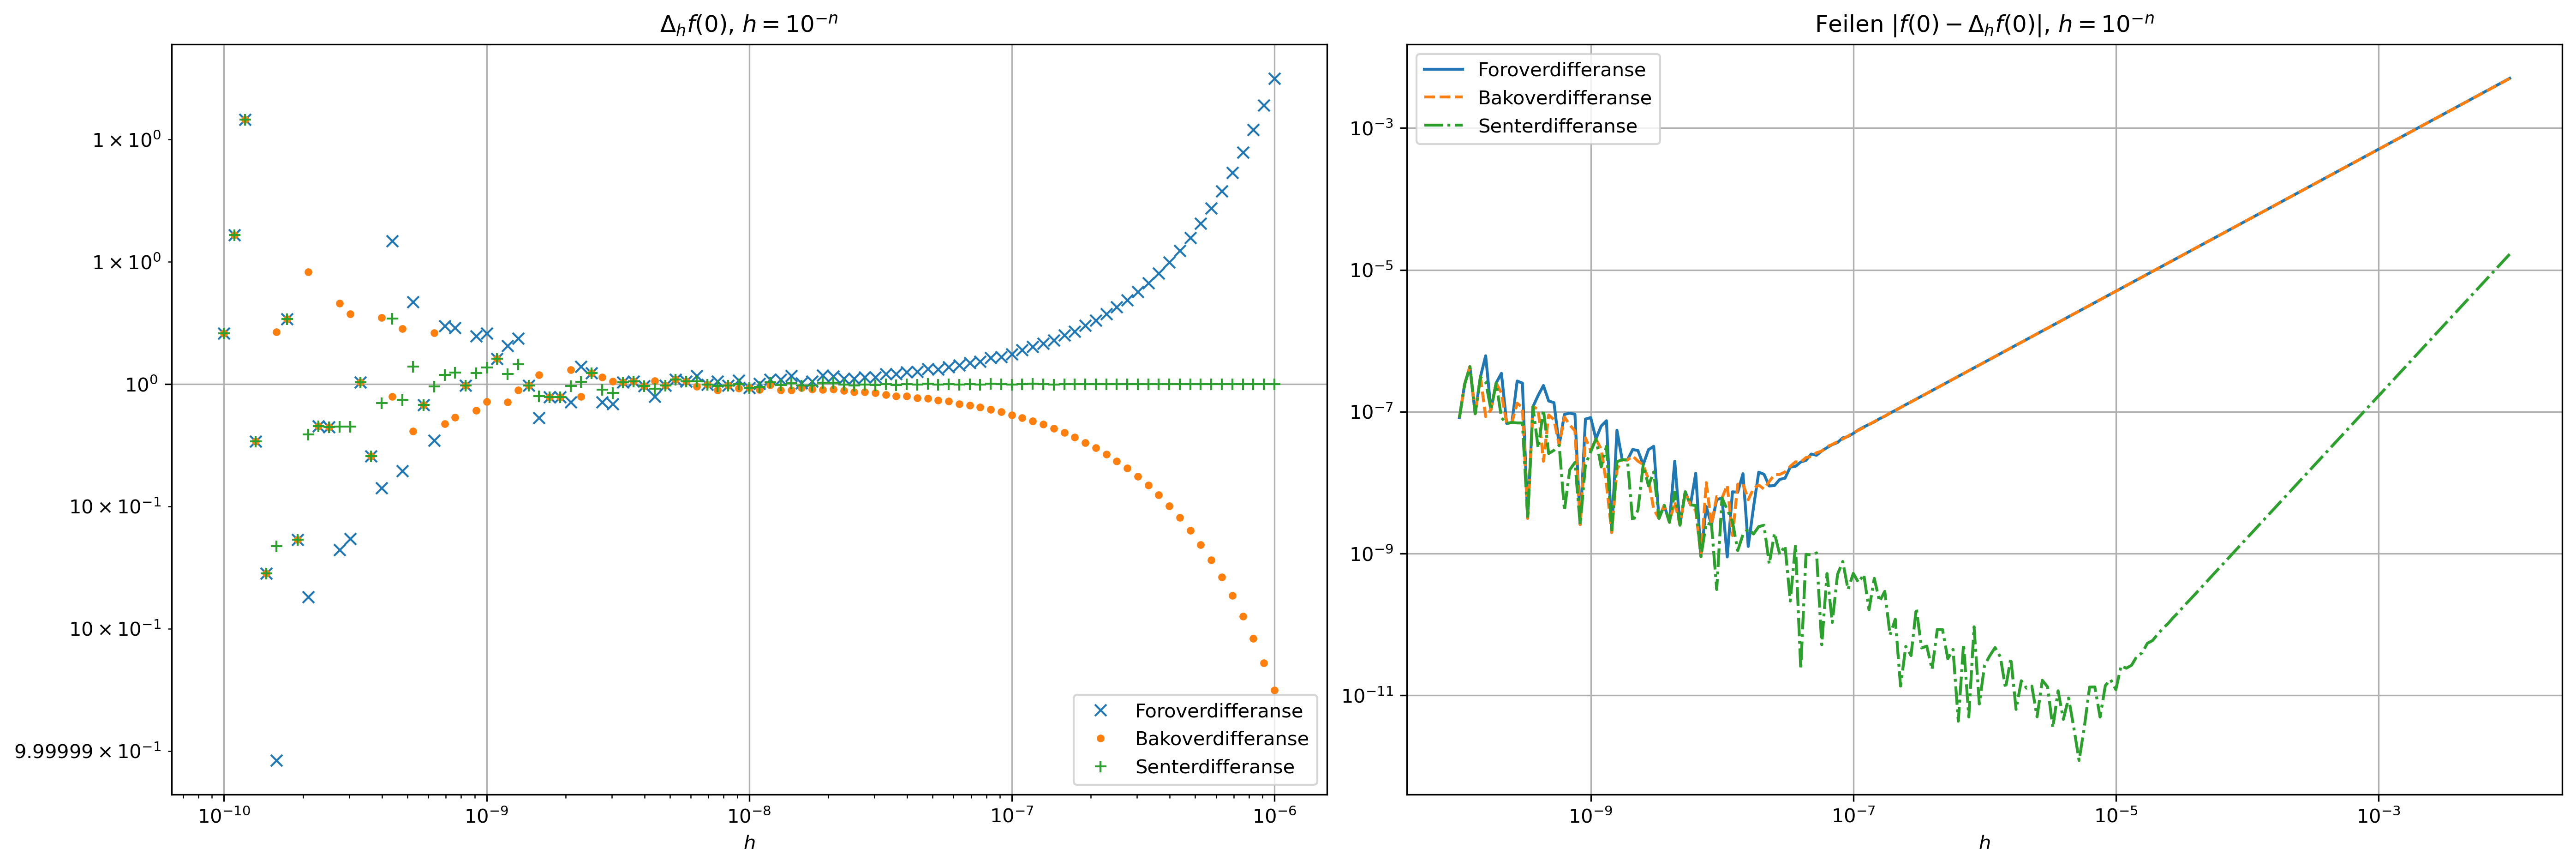

In [72]:
nmin = 2 # minste potens
nmax = 10 # største potens
M = 201 # antall h-verdier

H = np.logspace(-nmin,-nmax,M) # M logaritmisk jevnt fordelte punkter
g = np.zeros([M,3])


for n in range(0,M):
    h = H[n]
    g[n,0] = (np.exp(x+h)-np.exp(x))/h
    g[n,1] = (np.exp(x)-np.exp(x-h))/h
    g[n,2] = (np.exp(x+h)-np.exp(x-h))/(2*h)
    
err = np.abs(g-np.exp(x))
    
fig2, (ax4,ax5) = plt.subplots(1,2,figsize=(18,6),dpi=300)
fig2.tight_layout()

ax4.loglog(H[100:],g[100:,0],'x')
ax4.loglog(H[100:],g[100:,1],'.')
ax4.loglog(H[100:],g[100:,2],'+')
ax4.set_xlabel(r'$h$')
ax4.set_title(r'$h = 10^{-n}$')
ax4.set_title(r'$\Delta_h f(0)$, $h = 10^{-n}$')
ax4.legend(['Foroverdifferanse','Bakoverdifferanse','Senterdifferanse'])
ax4.grid(True)

ax5.loglog(H,err[:,0])
ax5.loglog(H,err[:,1],'--')
ax5.loglog(H,err[:,2],'-.')
ax5.set_xlabel(r'$h$')
ax5.set_title(r'Feilen $|f(0)-\Delta_h f(0)|$, $h = 10^{-n}$')
ax5.legend(['Foroverdifferanse','Bakoverdifferanse','Senterdifferanse'])
ax5.grid(True)

#fig2.savefig('1_num_ustab')

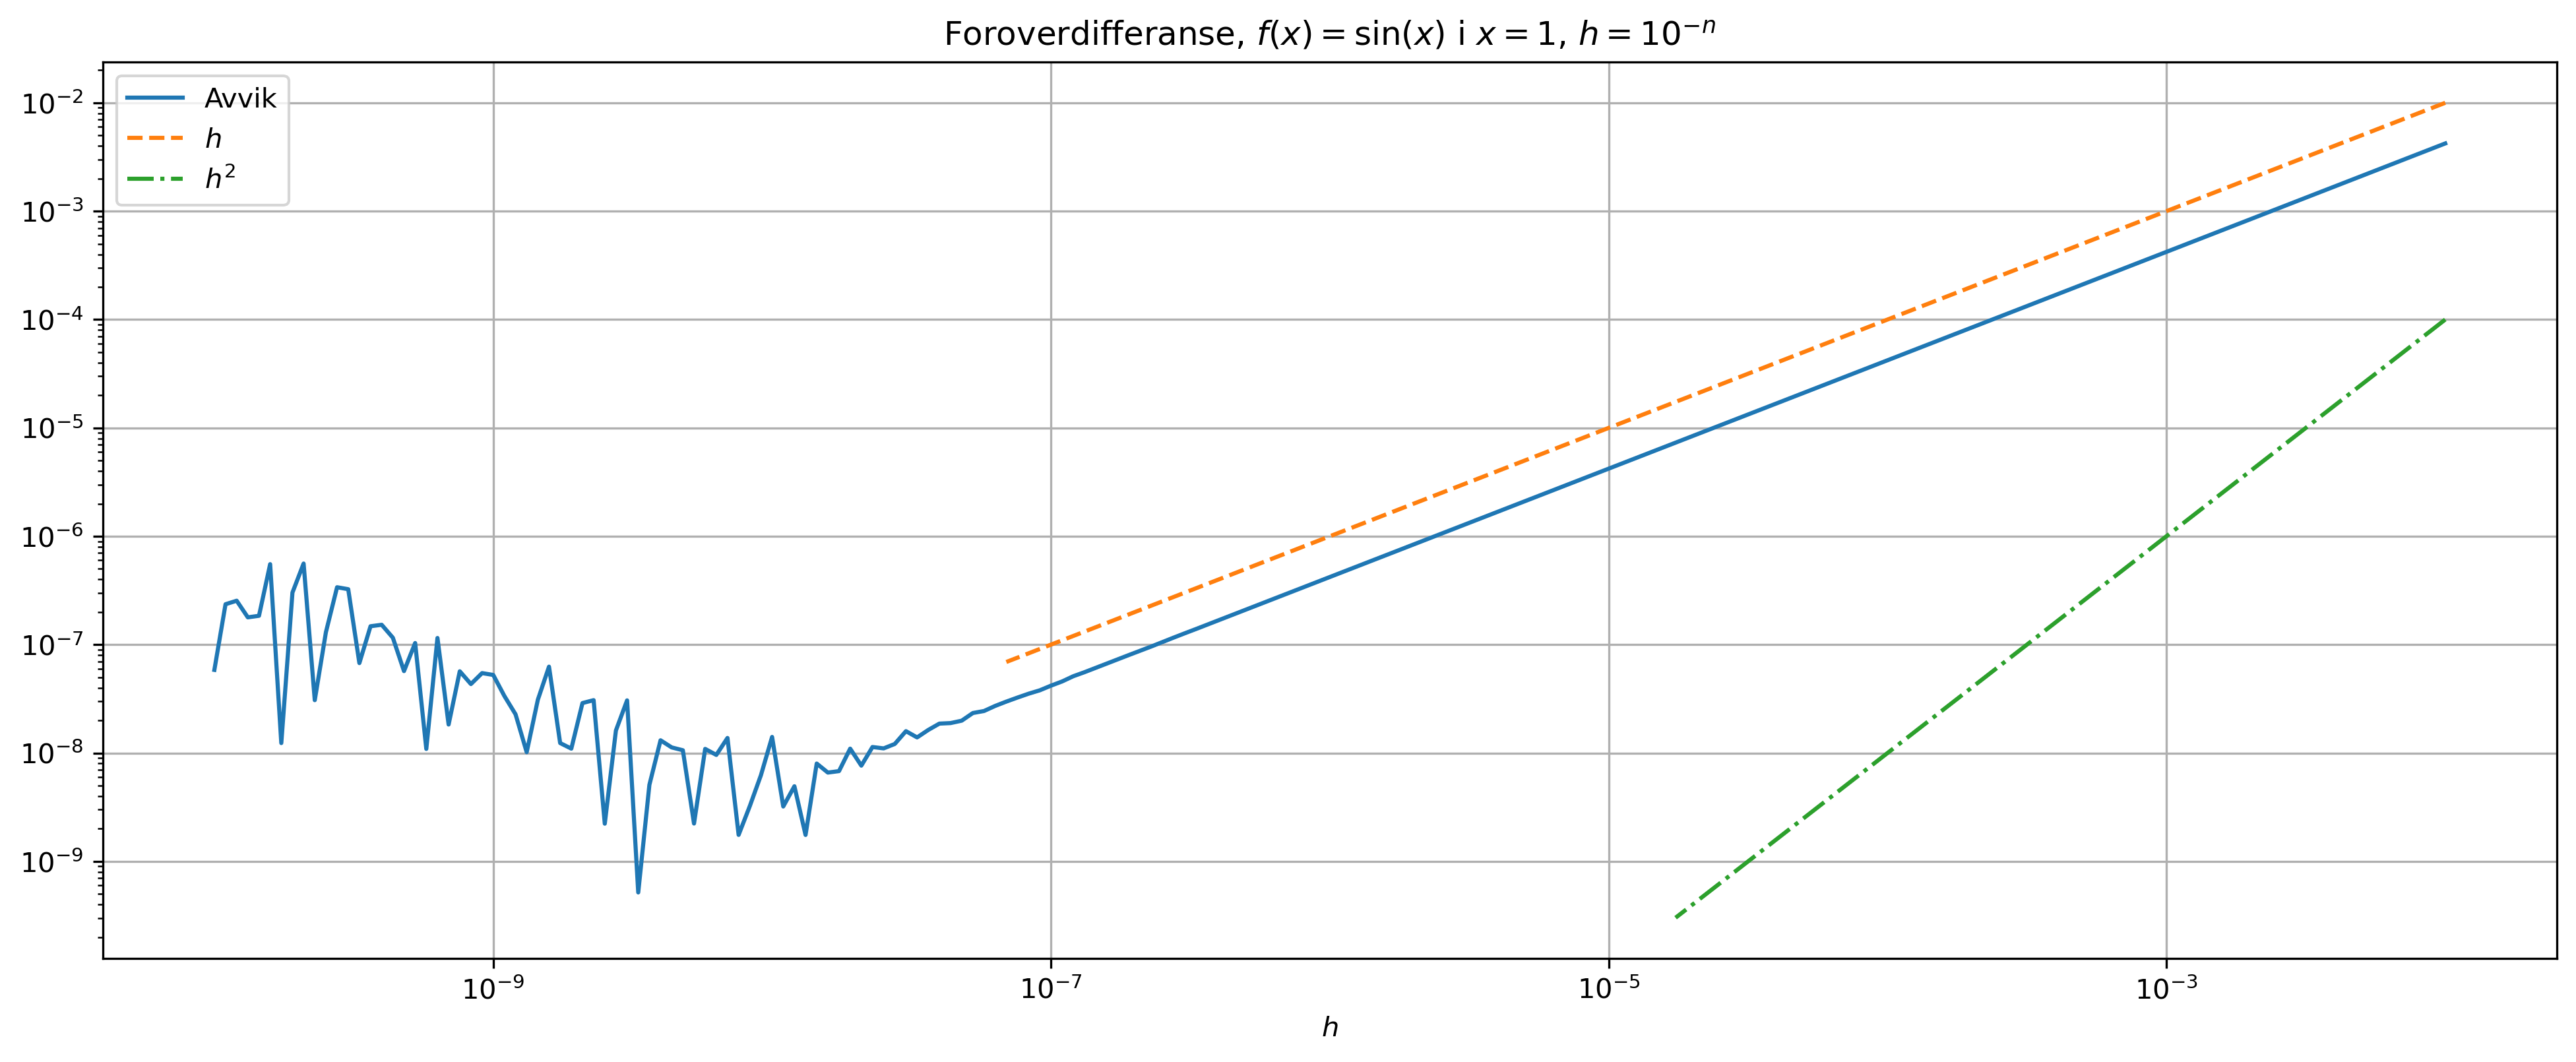

In [33]:
nmin = 2 # minste potens
nmax = 10 # største potens
M = 201 # antall h-verdier

H = np.logspace(-nmin,-nmax,M) # M logaritmisk jevnt fordelte punkter
g = np.zeros([M,3])
x = 1

for n in range(0,M):
    h = H[n]
    g[n,0] = (np.sin(x+h)-np.sin(x))/h
    g[n,1] = (np.sin(x)-np.sin(x-h))/h
    g[n,2] = (np.sin(x+h)-np.sin(x-h))/(2*h)
    
err = np.abs(g-np.cos(x))
    
fig2, ax5 = plt.subplots(1,1,figsize=(16,6),dpi=300)

#ax4.loglog(H[100:],g[100:,0],'x')
#ax4.set_xlabel('$h$')
#ax4.set_title('$h = 10^{-n}$')
#ax4.set_title('$\Delta_h f(x)$, $h = 10^{-n}$')
#ax4.legend(['Foroverdifferanse','Bakoverdifferanse','Sentraldifferanse'])
#ax4.grid(True)

ax5.loglog(H,err[:,0])
ax5.loglog(H[:130],H[:130],'--')
ax5.loglog(H[:70],H[:70]**2,'-.')
ax5.set_xlabel('$h$')
ax5.set_title('Foroverdifferanse, $f(x) = \sin(x)$ i $x=1$, $h = 10^{-n}$')
ax5.legend(['Avvik','$h$','$h^2$'])
ax5.grid(True)

#fig2.savefig('oving1_fordiff')